# Incremental build time

RQ1: Does incremental build time outperform the clean build time of a system?

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Will show the incremental build time and the executable's binary size for all system's configurations
path = '/src/data/rez_sample_03ALL/'
df = pd.read_csv(path + 'buildtime_di1.csv')
df.columns
df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})
df

,Unnamed: 0,Branch,Option,Build Time,Binary Size
0,0,ixz-00001-00002,"['--enable-encoders=lzma1,lzma2', '--enable-de...",10.9520,1072480
1,1,ixz-00001-00003,"['--enable-debug', '--enable-encoders=lzma1,lz...",-1.0000,-1
2,2,ixz-00001-00004,"['--enable-debug', '--enable-encoders=lzma1,po...",11.3420,1064448
3,3,ixz-00001-00005,"['--enable-debug', '--enable-encoders=lzma1,ia...",-1.0000,1215672
4,4,ixz-00001-00006,"['--enable-debug', '--enable-encoders=lzma1,po...",-1.0000,1215672
...,...,...,...,...,...
375,375,ixz-00020-00015,"['--enable-encoders=lzma1,arm', '--enable-deco...",10.7795,1092248
376,376,ixz-00020-00016,"['--enable-debug', '--enable-encoders=lzma1,lz...",-1.0000,1058496
377,377,ixz-00020-00017,"['--enable-encoders=lzma1,powerpc', '--enable-...",-1.0000,-1
378,378,ixz-00020-00018,"['--enable-encoders=lzma1,lzma2', '--enable-de...",10.6740,1080984


In [3]:
# For further analyses, the branch names are extracted into separate columns
df[['Br0', 'Br1','Br2']] = df.Branch.str.split("-",expand=True)
df_setindex = df.set_index("Br2")

df = df.rename(columns = {"bt_real": "Build Time", "BinarySize": "Binary Size"})

# The index is reset to incremental build configuration
dx = df.sort_index()
dx

,Unnamed: 0,Branch,Option,Build Time,Binary Size,Br0,Br1,Br2
0,0,ixz-00001-00002,"['--enable-encoders=lzma1,lzma2', '--enable-de...",10.9520,1072480,ixz,00001,00002
1,1,ixz-00001-00003,"['--enable-debug', '--enable-encoders=lzma1,lz...",-1.0000,-1,ixz,00001,00003
2,2,ixz-00001-00004,"['--enable-debug', '--enable-encoders=lzma1,po...",11.3420,1064448,ixz,00001,00004
3,3,ixz-00001-00005,"['--enable-debug', '--enable-encoders=lzma1,ia...",-1.0000,1215672,ixz,00001,00005
4,4,ixz-00001-00006,"['--enable-debug', '--enable-encoders=lzma1,po...",-1.0000,1215672,ixz,00001,00006
...,...,...,...,...,...,...,...,...
375,375,ixz-00020-00015,"['--enable-encoders=lzma1,arm', '--enable-deco...",10.7795,1092248,ixz,00020,00015
376,376,ixz-00020-00016,"['--enable-debug', '--enable-encoders=lzma1,lz...",-1.0000,1058496,ixz,00020,00016
377,377,ixz-00020-00017,"['--enable-encoders=lzma1,powerpc', '--enable-...",-1.0000,-1,ixz,00020,00017
378,378,ixz-00020-00018,"['--enable-encoders=lzma1,lzma2', '--enable-de...",10.6740,1080984,ixz,00020,00018


In [4]:
# A detailed view of each incremental build time after clean build configurations
# Columns: clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Build Time"])
opt3 = opt2.unstack()
opt3

Build Time                                                              \
Br1        00001    00002 00003    00004   00005 00006 00007    00008  00009   
Br2                                                                            
00001        NaN  12.8395  -1.0  12.5385 -1.0000  -1.0  -1.0  12.6185 -1.000   
00002    10.9520      NaN  -1.0  11.0000 -1.0000  -1.0  -1.0  11.3640 -1.000   
00003    -1.0000  -1.0000   NaN  -1.0000 -1.0000  -1.0  -1.0  -1.0000 -1.000   
00004    11.3420  11.6010  -1.0      NaN -1.0000  -1.0  -1.0  12.7880 -1.000   
00005    -1.0000  -1.0000  -1.0  -1.0000     NaN  -1.0  -1.0  -1.0000 -1.000   
00006    -1.0000  -1.0000  -1.0  -1.0000 -1.0000   NaN  -1.0  -1.0000 -1.000   
00007    -1.0000  -1.0000  -1.0  -1.0000 -1.0000  -1.0   NaN  -1.0000 -1.000   
00008    12.0075  12.6135  -1.0  12.3040 -1.0000  -1.0  -1.0      NaN  1.348   
00009    -1.0000  -1.0000  -1.0  -1.0000 -1.0000  -1.0  -1.0   0.4235    NaN   
00010    -1.0000  -1.0000  -1.0  -1.0000  0.8695  -1.0  -1.0  -1.0000 -1.000   
00011    -1.0000  -1.0000  -1.0  -1.0000 -1.0000  -1.0  -1.0  -1.0000 -1.000   
00012    10.6270  11.2350  -1.0  11.3230 -1.0000  -1.0  -1.0  11.4415 -1.000   
00013    -1.0000  -1.0000  -1.0  -1.0000 -1.0000  -1.0  -1.0  -1.0000 -1.000   
00014    -1.0000  -1.0000  -1.0  -1.0000 -1.0000  -1.0  -1.0  -1.0000 -1.000   
00015    11.0965  11.6475  -1.0  11.7670 -1.0000  -1.0  -1.0  11.7270 -1.000   
00016    -1.0000  -1.0000  -1.0  -1.0000 -1.0000  -1.0  -1.0  -1.0000 -1.000   
00017    -1.0000  -1.0000  -1.0  -1.0000 -1.0000  -1.0  -1.0  -1.0000 -1.000   
00018    11.1255  11.8615  -1.0  11.4625 -1.0000  -1.0  -1.0  11.3600 -1.000   
00019    -1.0000  -1.0000  -1.0  -1.0000 -1.0000  -1.0  -1.0  -1.0000 -1.000   
00020    10.9585  11.0255  -1.0  10.9245 -1.0000  -1.0  -1.0  12.1930 -1.000   

                                                                          \
Br1    00010 00011    00012   00013 00014    00015 00016  00017    00018   
Br2                                                                        
00001 -1.000  -1.0  12.4605 -1.0000  -1.0  12.4260  -1.0 -1.000  11.4335   
00002 -1.000  -1.0  11.1065 -1.0000  -1.0  11.8520  -1.0 -1.000  10.2835   
00003 -1.000  -1.0  -1.0000 -1.0000  -1.0  -1.0000  -1.0 -1.000  -1.0000   
00004 -1.000  -1.0  11.7335 -1.0000  -1.0  11.8470  -1.0 -1.000  10.7215   
00005  0.399  -1.0  -1.0000 -1.0000  -1.0  -1.0000  -1.0 -1.000  -1.0000   
00006 -1.000  -1.0  -1.0000 -1.0000  -1.0  -1.0000  -1.0 -1.000  -1.0000   
00007 -1.000  -1.0  -1.0000 -1.0000  -1.0  -1.0000  -1.0 -1.000  -1.0000   
00008 -1.000  -1.0  12.3560 -1.0000  -1.0  12.2145  -1.0 -1.000  11.2760   
00009 -1.000  -1.0  -1.0000 -1.0000  -1.0  -1.0000  -1.0 -1.000  -1.0000   
00010    NaN  -1.0  -1.0000 -1.0000  -1.0  -1.0000  -1.0 -1.000  -1.0000   
00011 -1.000   NaN  -1.0000 -1.0000  -1.0  -1.0000  -1.0 -1.000  -1.0000   
00012 -1.000  -1.0      NaN -1.0000  -1.0  11.1230  -1.0 -1.000  10.0605   
00013 -1.000  -1.0  -1.0000     NaN  -1.0  -1.0000  -1.0  0.607  -1.0000   
00014 -1.000  -1.0  -1.0000 -1.0000   NaN  -1.0000  -1.0 -1.000  -1.0000   
00015 -1.000  -1.0  11.6345 -1.0000  -1.0      NaN  -1.0 -1.000  10.6535   
00016 -1.000  -1.0  -1.0000 -1.0000  -1.0  -1.0000   NaN -1.000  -1.0000   
00017 -1.000  -1.0  -1.0000  0.9615  -1.0  -1.0000  -1.0    NaN  -1.0000   
00018 -1.000  -1.0  11.2820 -1.0000  -1.0  11.3190  -1.0 -1.000      NaN   
00019 -1.000  -1.0  -1.0000 -1.0000  -1.0  -1.0000  -1.0 -1.000  -1.0000   
00020 -1.000  -1.0  10.9895 -1.0000  -1.0  11.2745  -1.0 -1.000  10.2980   

                      
Br1   00019    00020  
Br2                   
00001  -1.0  11.6475  
00002  -1.0  10.3605  
00003  -1.0  -1.0000  
00004  -1.0  10.7265  
00005  -1.0  -1.0000  
00006  -1.0  -1.0000  
00007  -1.0  -1.0000  
00008  -1.0  11.5235  
00009  -1.0  -1.0000  
00010  -1.0  -1.0000  
00011  -1.0  -1.0000  
00012  -1.0  10.3240  
00013  -1.0  -1.0000  
00014  -1.0  -1.0000  
00015  -1.0  10.7795  
00

In [5]:
# The order or configurations that provide the minimum incremental build time.

opt3['MIN'] = opt3.apply( lambda x: opt3.columns[x == x.min()][0], axis=1)
opt3 = opt3[['MIN']]
opt3

,MIN
Br1,
Br2,
00001,"(Build Time, 00003)"
00002,"(Build Time, 00003)"
00003,"(Build Time, 00001)"
00004,"(Build Time, 00003)"
00005,"(Build Time, 00001)"
00006,"(Build Time, 00001)"
00007,"(Build Time, 00001)"
00008,"(Build Time, 00003)"


In [6]:
# A detailed view of each executable's binary size after incremental built configurations
# Columns: Clean build
# Rows: Incremental build
opt2 = df.pivot_table(index = ["Br2", "Br1"],
                    values=["Binary Size"])
opt2.unstack()

Binary Size                                                         \
Br1         00001      00002      00003      00004      00005      00006   
Br2                                                                        
00001         NaN  1215672.0  1209072.0  1215672.0  1067256.0  1108144.0   
00002   1072480.0        NaN       -1.0  1072480.0       -1.0       -1.0   
00003        -1.0       -1.0        NaN       -1.0       -1.0       -1.0   
00004   1064448.0  1064448.0  1209072.0        NaN       -1.0  1108144.0   
00005   1215672.0  1072480.0  1209072.0  1064448.0        NaN  1108144.0   
00006   1215672.0  1072480.0  1209072.0  1064448.0       -1.0        NaN   
00007        -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00008   1180656.0  1180656.0       -1.0  1180656.0       -1.0       -1.0   
00009        -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00010   1215672.0  1072480.0  1209072.0  1064448.0  1067256.0  1108144.0   
00011        -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00012   1037416.0  1037416.0       -1.0  1037416.0       -1.0       -1.0   
00013   1215672.0  1072480.0  1209072.0  1064448.0  1067256.0  1108144.0   
00014   1215672.0  1072480.0  1209072.0  1064448.0       -1.0  1108144.0   
00015   1092248.0  1092248.0       -1.0  1092248.0       -1.0       -1.0   
00016   1215672.0  1072480.0  1209072.0  1064448.0  1067256.0  1108144.0   
00017        -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00018   1080984.0  1080984.0  1209072.0  1080984.0  1067256.0  1108144.0   
00019   1215672.0  1072480.0  1209072.0  1064448.0  1067256.0       -1.0   
00020   1058496.0  1058496.0  1209072.0  1058496.0  1067256.0  1108144.0   

                                                                         \
Br1        00007      00008      00009      00010      00011      00012   
Br2                                                                       
00001  1145960.0  1215672.0  1153072.0  1005216.0  1050248.0  1215672.0   
00002       -1.0  1072480.0       -1.0       -1.0       -1.0  1072480.0   
00003       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00004  1145960.0  1064448.0  1153072.0  1005216.0  1050248.0  1064448.0   
00005  1145960.0  1180656.0  1153072.0  1005216.0  1050248.0  1037416.0   
00006       -1.0  1180656.0  1153072.0       -1.0  1050248.0  1037416.0   
00007        NaN       -1.0       -1.0       -1.0       -1.0       -1.0   
00008       -1.0        NaN  1153072.0       -1.0       -1.0  1180656.0   
00009       -1.0  1180656.0        NaN       -1.0       -1.0       -1.0   
00010  1145960.0  1180656.0  1153072.0        NaN  1050248.0  1037416.0   
00011       -1.0       -1.0       -1.0       -1.0        NaN       -1.0   
00012       -1.0  1037416.0       -1.0       -1.0       -1.0        NaN   
00013  1145960.0  1180656.0       -1.0  1005216.0       -1.0  1037416.0   
00014       -1.0  1180656.0       -1.0  1005216.0       -1.0  1037416.0   
00015       -1.0  1092248.0       -1.0       -1.0       -1.0  1092248.0   
00016  1145960.0  1180656.0  1153072.0  1005216.0  1050248.0  1037416.0   
00017       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00018  1145960.0  1080984.0  1153072.0  1005216.0  1050248.0  1080984.0   
00019  1145960.0  1180656.0  1153072.0       -1.0  1050248.0  1037416.0   
00020  1145960.0  1058496.0  1153072.0  1005216.0  1050248.0  1058496.0   

                                                                         \
Br1        00013      00014      00015      00016      00017      00018   
Br2                                                                       
00001  1067432.0  1140664.0  1215672.0  1290136.0  1005520.0  1215672.0   
00002       -1.0       -1.0  1072480.0       -1.0       -1.0  1072480.0   
00003       -1.0       -1.0       -1.0       -1.0       -1.0       -1.0   
00004  1067432.0  1140664.0  1064448.0  1290136.0  1005520.0  1064448.0   
00005 

In [7]:
# The minimum, maximum, and average incremental build time for each system's configuration
ib_results = df.pivot_table(index = ["Br2"], 
                    values=["Build Time"], # values=["Build Time", "Binary Size"],
                    aggfunc=['max', 'mean', 'min'],
                    margins=True,
                    margins_name="Total")

ib_results[:-1].to_csv(path + 'incremental-bt.csv', 
                index=True, 
                header=['max', 'mean', 'min'])
ib_results

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,12.8395,3.892842,-1.0
00002,11.8520,3.416763,-1.0
00003,-1.0000,-1.000000,-1.0
00004,12.7880,3.618921,-1.0
00005,0.3990,-0.926368,-1.0
00006,-1.0000,-1.000000,-1.0
00007,-1.0000,-1.000000,-1.0
00008,12.6135,3.928579,-1.0


In [8]:
sorted_min_ib = ib_results.reindex(ib_results['min'].sort_values(by="Build Time", ascending=False).index)
sorted_min_ib

,max,mean,min
,Build Time,Build Time,Build Time
Br2,,,
00001,12.8395,3.892842,-1.0
00012,11.4415,3.375474,-1.0
00020,12.1930,3.455974,-1.0
00019,-1.0000,-1.000000,-1.0
00018,11.8615,3.530763,-1.0
00017,0.9615,-0.896763,-1.0
00016,-1.0000,-1.000000,-1.0
00015,11.7670,3.542395,-1.0


<AxesSubplot:xlabel='Configurations', ylabel='incremental build time [s]'>

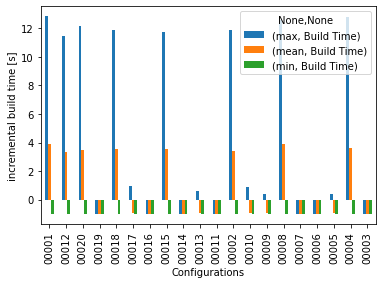

In [9]:
# Visualized the minimum, maxium, and average incremental build time for all configurations
import matplotlib.pyplot as plt

ib_plot = sorted_min_ib.iloc[:-1].plot(kind='bar')

ib_plot.set_xlabel("Configurations")
ib_plot.set_ylabel("incremental build time [s]")

plt.savefig("./figures/fig01.pdf", bbox_inches = 'tight', pad_inches = 0)

ib_plot

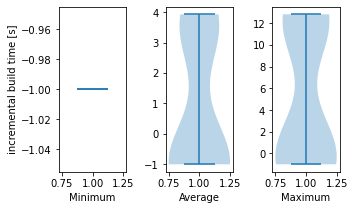

In [10]:
# The minimum, average, and maximum incremental build time summaried for all configurations
import matplotlib.pyplot as plt
 
all_data1 = ib_results['min']
labels1 = 'Minimum'
all_data2 = ib_results['mean']
labels2 = 'Average'
all_data3 = ib_results['max']
labels3 = 'Maximum'
     
plt.rc('font', size=10) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(5, 3))

ax1.violinplot(all_data1)
ax1.set_xlabel(labels1)
ax1.set_ylabel("incremental build time [s]")
                    
ax2.violinplot(all_data2)
ax2.set_xlabel(labels2)

ax3.violinplot(all_data3)
ax3.set_xlabel(labels3)

fig.tight_layout(pad=1.0)
plt.savefig("./figures/fig02.pdf", bbox_inches = 'tight', pad_inches = 0)

plt.show()

In [11]:
# Converting the Pivot Table to Data Frame

ptbl = df.pivot_table(index = ["Br2"],
                    columns="Br1",
                    values=["Build Time"])

ptbl.columns = ptbl.columns.droplevel(level=0) #remove "Build Time"
ptbl.columns.name = None                       #remove "Br1"
rtbl = ptbl.reset_index() 

tbl = pd.DataFrame(data=rtbl)

tbl = tbl.set_index("Br2")

pd.set_option("display.max_columns", None)

#tbl = df_setindex[['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
#                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
#                '00015', '00016', '00017', '00018', '00019', '00020']]

# Export it to a CSV file, to use it in another notebook
tbl[:].to_csv(path + 'i_data_frame.csv', 
                index=True, 
                header=['00001', '00002', '00003', '00004', '00005', '00006', '00007', 
                '00008', '00009', '00010', '00011', '00012', '00013', '00014', 
                '00015', '00016', '00017', '00018', '00019', '00020'])

tbl

,00001,00002,00003,00004,00005,00006,00007,00008,00009,00010,00011,00012,00013,00014,00015,00016,00017,00018,00019,00020
Br2,,,,,,,,,,,,,,,,,,,,
00001,NaN,12.8395,-1.0,12.5385,-1.0000,-1.0,-1.0,12.6185,-1.000,-1.000,-1.0,12.4605,-1.0000,-1.0,12.4260,-1.0,-1.000,11.4335,-1.0,11.6475
00002,10.9520,NaN,-1.0,11.0000,-1.0000,-1.0,-1.0,11.3640,-1.000,-1.000,-1.0,11.1065,-1.0000,-1.0,11.8520,-1.0,-1.000,10.2835,-1.0,10.3605
00003,-1.0000,-1.0000,NaN,-1.0000,-1.0000,-1.0,-1.0,-1.0000,-1.000,-1.000,-1.0,-1.0000,-1.0000,-1.0,-1.0000,-1.0,-1.000,-1.0000,-1.0,-1.0000
00004,11.3420,11.6010,-1.0,NaN,-1.0000,-1.0,-1.0,12.7880,-1.000,-1.000,-1.0,11.7335,-1.0000,-1.0,11.8470,-1.0,-1.000,10.7215,-1.0,10.7265
00005,-1.0000,-1.0000,-1.0,-1.0000,NaN,-1.0,-1.0,-1.0000,-1.000,0.399,-1.0,-1.0000,-1.0000,-1.0,-1.0000,-1.0,-1.000,-1.0000,-1.0,-1.0000
00006,-1.0000,-1.0000,-1.0,-1.0000,-1.0000,NaN,-1.0,-1.0000,-1.000,-1.000,-1.0,-1.0000,-1.0000,-1.0,-1.0000,-1.0,-1.000,-1.0000,-1.0,-1.0000
00007,-1.0000,-1.0000,-1.0,-1.0000,-1.0000,-1.0,NaN,-1.0000,-1.000,-1.000,-1.0,-1.0000,-1.0000,-1.0,-1.0000,-1.0,-1.000,-1.0000,-1.0,-1.0000
00008,12.0075,12.6135,-1.0,12.3040,-1.0000,-1.0,-1.0,NaN,1.348,-1.000,-1.0,12.3560,-1.0000,-1.0,12.2145,-1.0,-1.000,11.2760,-1.0,11.5235
00009,-1.0000,-1.0000,-1.0,-1.0000,-1.0000,-1.0,-1.0,0.4235,NaN,-1.000,-1.0,-1.0000,-1.0000,-1.0,-1.0000,-1.0,-1.000,-1.0000,-1.0,-1.0000
